In [171]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
data1 = pd.read_csv('../../data/energy_dataset.csv')
data2 = pd.read_csv('../../data/weather_features.csv')
dataVal = data2.loc[data2["city_name"]=='Valencia']


# merge data
df = pd.merge(data1, dataVal,left_on="time",right_on="dt_iso")

df=df.drop_duplicates()
df=df.drop(columns=["temp_max","temp_min"])


# Returns list of tuples of energy and weather data sorted by correlation
def sortedCorr(data1,data2,df):
    cList = []
    # list of tuples of data and correlation
    for col1 in data2.columns:
        for col2 in data1.columns:
            if col1 != col2 and col1 in df and col2 in df:
                cf=df[[col1,col2]].corr()
                if col1 in cf and col2 in cf:
                    num = cf[col2].iloc[0]
                    if np.isnan(num)==False and num<1:
                        cList.append((num,col1,col2))

    # sort tuples based on correlation
    cList.sort(reverse=True,key = lambda x: abs(x[0]))
    return cList

# Get average values from all cities

In [312]:
names = pd.unique(data2["city_name"])
namedData=[]

# Create new dataframe for each city and store in list
total = pd.DataFrame()
for name in names:
    cityData = data2.loc[data2["city_name"]==name]
    dfn = pd.merge(data1, cityData,left_on="time",right_on="dt_iso")
    
    dfn=dfn.drop_duplicates("time")
    dfn=dfn.select_dtypes(["number"])
    print(name[0]+name[1])
    if(not(total.empty)):
        total+=dfn
    else:
        total=dfn
    print(total.shape)
    
print("Finished")

Va
(35064, 40)
Ma
(35064, 40)
Bi
(35064, 40)
 B
(35064, 40)
Se
(35064, 40)
Finished


In [313]:
total.head()

generation biomass  generation fossil brown coal/lignite  \
0              2235.0                                1645.0   
1              2245.0                                1640.0   
2              2240.0                                1615.0   
3              2190.0                                1270.0   
4              2140.0                                 935.0   

   generation fossil coal-derived gas  generation fossil gas  \
0                                 0.0                24220.0   
1                                 0.0                25980.0   
2                                 0.0                24285.0   
3                                 0.0                21570.0   
4                                 0.0                20650.0   

   generation fossil hard coal  generation fossil oil  \
0                      24105.0                  810.0   
1                      23775.0                  790.0   
2                      22905.0                  785.0   
3                      20655.0                  800.0   
4                      19200.0                  780.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   generation hydro pumped storage aggregated  ...     temp_max  pressure  \
0                                         NaN  ...  1362.457312    5082.0   
1                                         NaN  ...  1362.563500    5081.0   
2                                         NaN  ...  1360.495688    5084.0   
3                                         NaN  ...  1360.447344    5083.0   
4                                         NaN  ...  1360.729500    5083.0   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0     412.0        10.0     676.0      0.0      0.0      0.0         0.0   
1     412.0        10.0     679.0      0.0      0.0      0.0         0.0   
2     410.0        12.0     595.0      0.0      0.0      0.0         0.0   
3     410.0        12.0     596.0      0.0      0.0      0.0         0.0   
4     410.0        12.0     592.0      0.0      0.0      0.0         0.0   

   weather_id  
0      4000.0  
1      4000.0  
2      4000.0  
3      4000.0  
4      4000.0  

[5 rows x 40 columns]

### Weighted avg

In [314]:
pops2017 = {"Va": 788000, "Ma": 3183000, "Bi": 345000, " B": 1621000, "Se": 689000}
totalPop2017= 788000 + 3183000 + 345000 + 1621000 + 689000
pops2017["Va"] /= totalPop2017
pops2017["Ma"] /= totalPop2017
pops2017["Bi"] /= totalPop2017
pops2017[" B"] /= totalPop2017
pops2017["Se"] /= totalPop2017

weightedAvg = pd.DataFrame()
for name in names:
    cityData = data2.loc[data2["city_name"]==name]
    dfn = pd.merge(data1, cityData,left_on="time",right_on="dt_iso")
    
    dfn=dfn.drop_duplicates("time")
    dfn=dfn.select_dtypes(["number"])
    print(name[0]+name[1])
    if(not(weightedAvg.empty)):
        weightedAvg+=dfn*pops2017[name[0]+name[1]]
    else:
        weightedAvg=dfn*pops2017[name[0]+name[1]]
    print(weightedAvg.shape)

Va
(35064, 40)
Ma
(35064, 40)
Bi
(35064, 40)
 B
(35064, 40)
Se
(35064, 40)


In [315]:
weightedAvg.head()

generation biomass  generation fossil brown coal/lignite  \
0               447.0                                 329.0   
1               449.0                                 328.0   
2               448.0                                 323.0   
3               438.0                                 254.0   
4               428.0                                 187.0   

   generation fossil coal-derived gas  generation fossil gas  \
0                                 0.0                 4844.0   
1                                 0.0                 5196.0   
2                                 0.0                 4857.0   
3                                 0.0                 4314.0   
4                                 0.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   generation hydro pumped storage aggregated  ...    temp_max     pressure  \
0                                         NaN  ...  271.948543  1000.680199   
1                                         NaN  ...  271.954072  1000.628132   
2                                         NaN  ...  271.277437  1001.043767   
3                                         NaN  ...  271.274920  1000.991699   
4                                         NaN  ...  271.289611  1000.991699   

    humidity  wind_speed    wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0  76.734832    2.415786  183.951102      0.0      0.0      0.0         0.0   
1  76.734832    2.415786  184.107305      0.0      0.0      0.0         0.0   
2  76.918201    2.556897  160.092665      0.0      0.0      0.0         0.0   
3  76.918201    2.556897  160.144733      0.0      0.0      0.0         0.0   
4  76.918201    2.556897  159.936462      0.0      0.0      0.0         0.0   

   weather_id  
0       800.0  
1       800.0  
2       800.0  
3       800.0  
4       800.0  

[5 rows x 40 columns]

In [316]:
totalNum = total.select_dtypes(["number"]) # Grab just numerical values
dfAvg = totalNum.applymap(lambda x: x/5) # Find average

## Finished finding avg values

In [322]:
print(dfAvg.head())
print(weightedAvg.head())
dfAvg.to_csv("AvgEnergyWeather.csv")
weightedAvg.to_csv("WeightedAvgEnergyWeather.csv")

   generation biomass  generation fossil brown coal/lignite  \
0               447.0                                 329.0   
1               449.0                                 328.0   
2               448.0                                 323.0   
3               438.0                                 254.0   
4               428.0                                 187.0   

   generation fossil coal-derived gas  generation fossil gas  \
0                                 0.0                 4844.0   
1                                 0.0                 5196.0   
2                                 0.0                 4857.0   
3                                 0.0                 4314.0   
4                                 0.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3       

<AxesSubplot:>

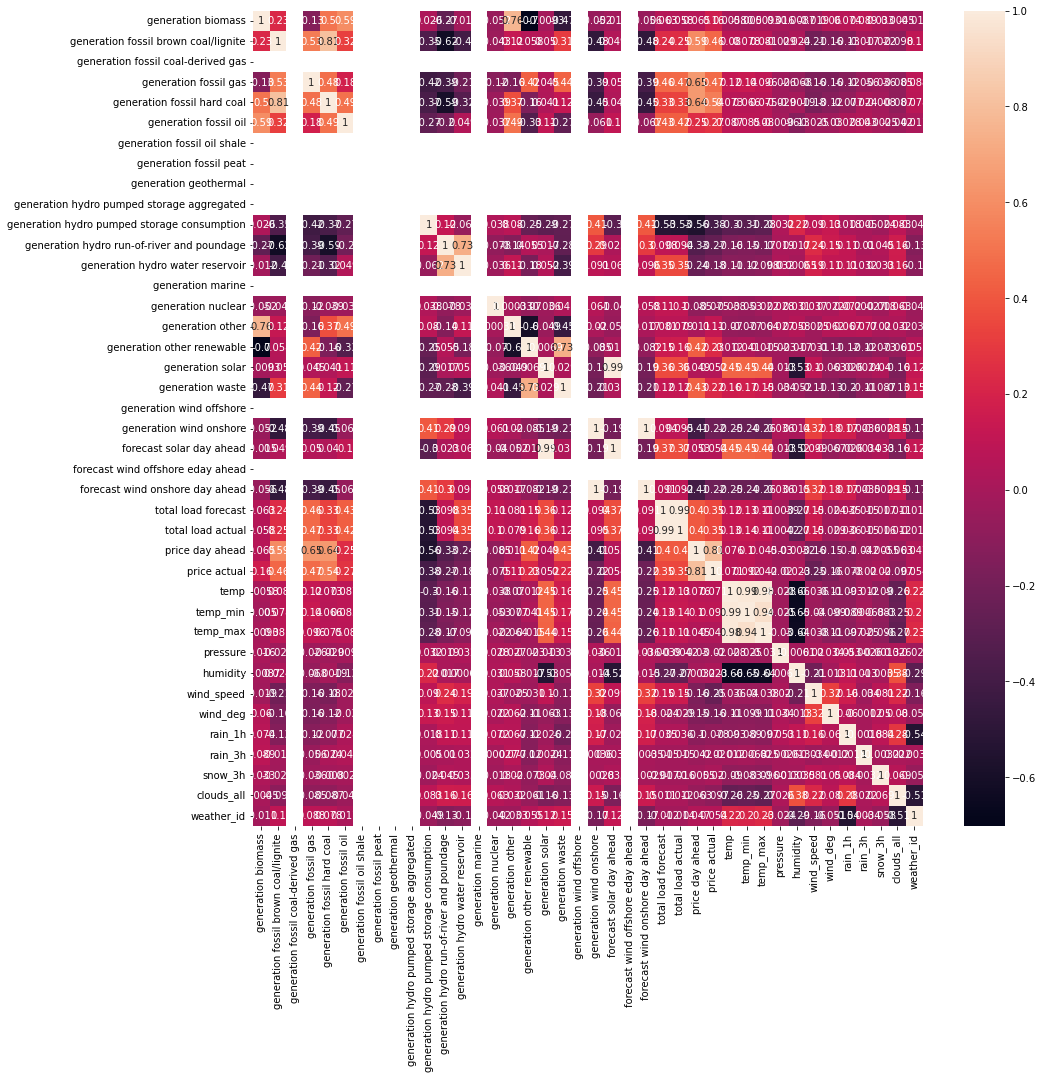

In [318]:
plt.figure(figsize=(15,15))
sns.heatmap(dfAvg.corr(), annot=True, fmt='.2g')

In [319]:
energyAvg = dfAvg.loc[:, avg.columns.isin(data1.columns)]
weatherAvg = dfAvg.loc[:, avg.columns.isin(data2.drop(columns=["temp_min","temp_max"]).columns)]
avgCorr=sortedCorr(energyAvg,weatherAvg,dfAvg)

humidity | generation solar
-0.5292781404738623


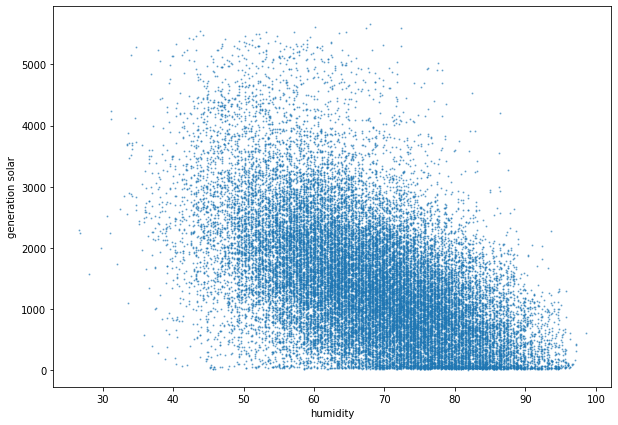

humidity | forecast solar day ahead
-0.5243971454399289


temp | forecast solar day ahead
0.45038412962149005


temp | generation solar
0.44632876786542586


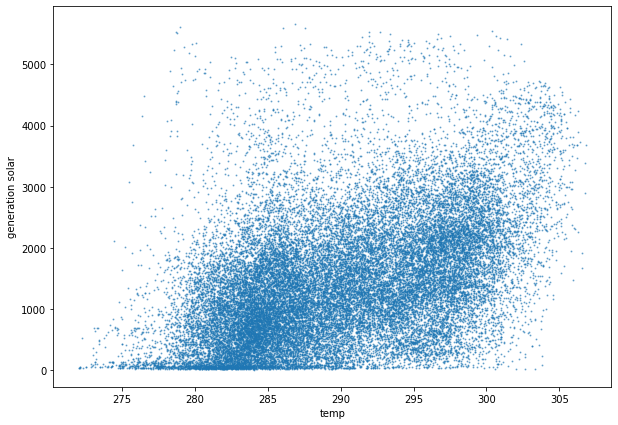

wind_speed | generation wind onshore
0.32222300340392496


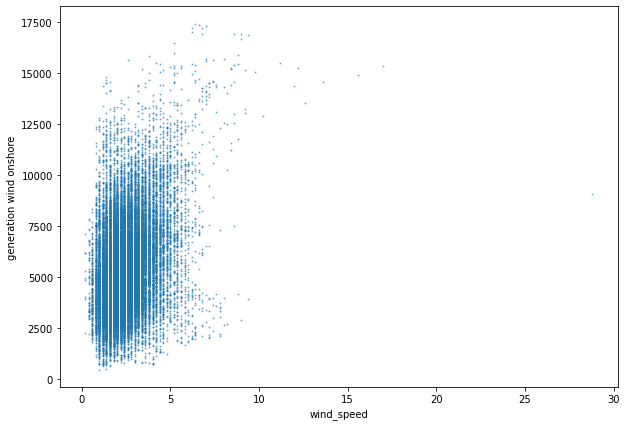

wind_speed | forecast wind onshore day ahead
0.32111505235963694


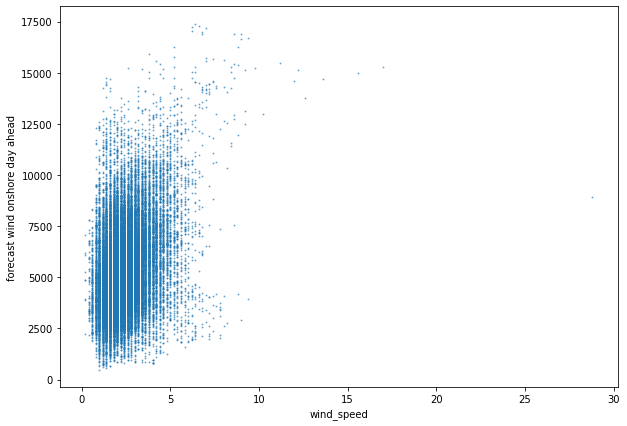

temp | generation hydro pumped storage consumption
-0.3010084076976083


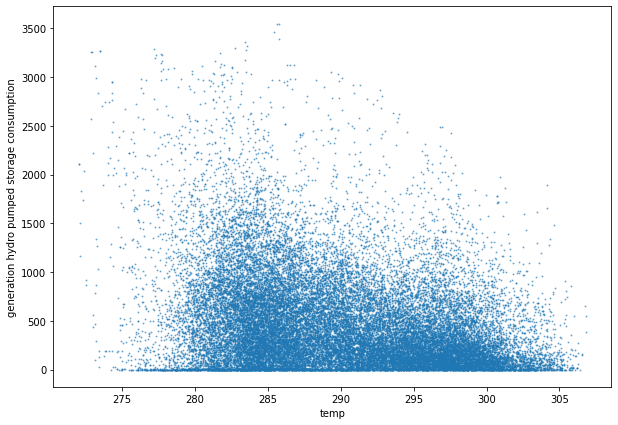

humidity | total load actual
-0.2664866489612815


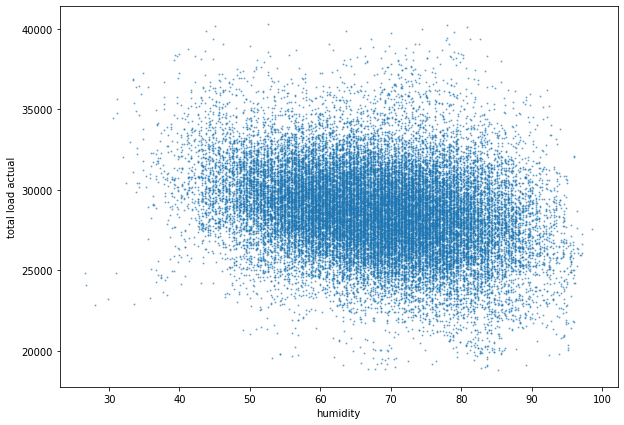

humidity | total load forecast
-0.2657917628204247


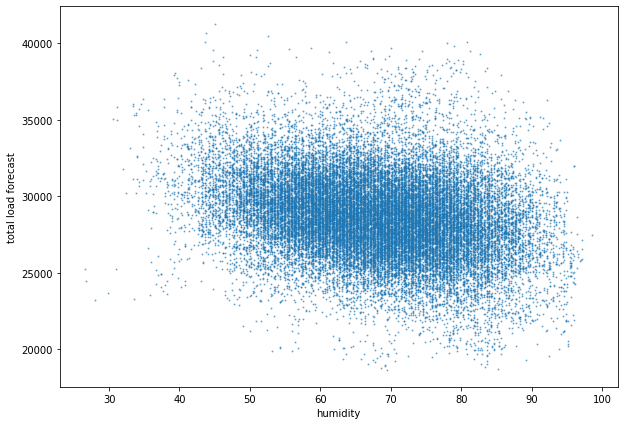

temp | generation wind onshore
-0.24877569827539475


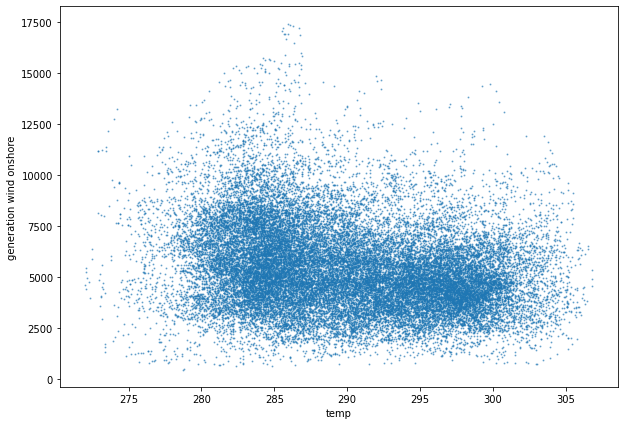

In [320]:
for tup in avgCorr[0:10]:
    # tuple data
    print(tup[1],"|",tup[2])
    print(tup[0])

    # scatter plot
    plt.figure(figsize=(10,7))
    plt.scatter(dfAvg[[tup[1]]],dfAvg[[tup[2]]], color='tab:blue', alpha=.5, s=1)
    plt.xlabel(tup[1])
    plt.ylabel(tup[2])
    plt.show()

In [309]:
energyWAvg = weightedAvg.loc[:, avg.columns.isin(data1.columns)]
weatherWAvg = weightedAvg.loc[:, avg.columns.isin(data2.drop(columns=["temp_min","temp_max"]).columns)]
weightedCorr=sortedCorr(energyWAvg,weatherWAvg,weightedAvg)

Weighted average correlation is slightly worse and it has an effect on the graphs. It does not seem like using it would be benifical.

humidity | generation solar
-0.46155003209691337


humidity | forecast solar day ahead
-0.4554262397995777


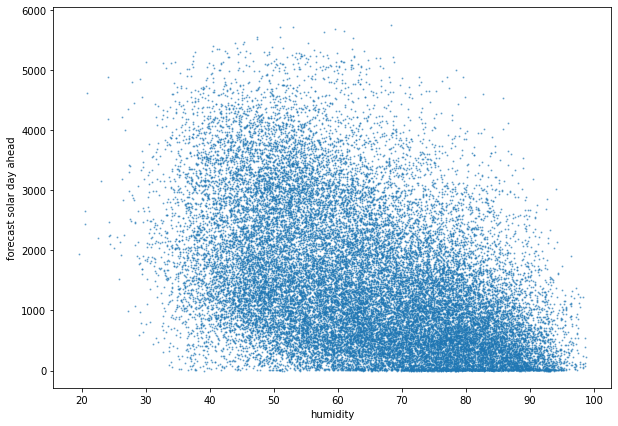

temp | forecast solar day ahead
0.41613213706437446


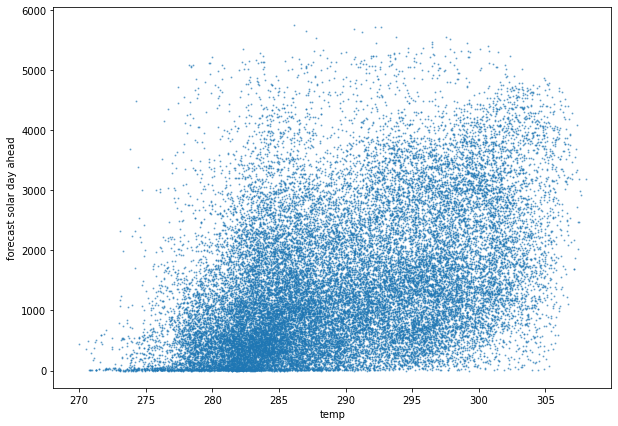

temp | generation solar
0.4124891816313606


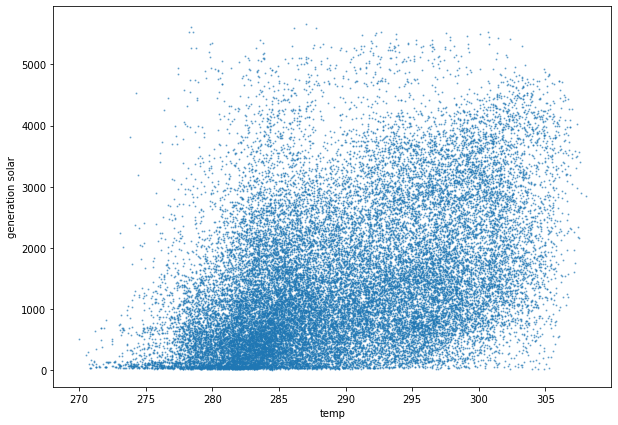

wind_speed | generation wind onshore
0.3111425356938029


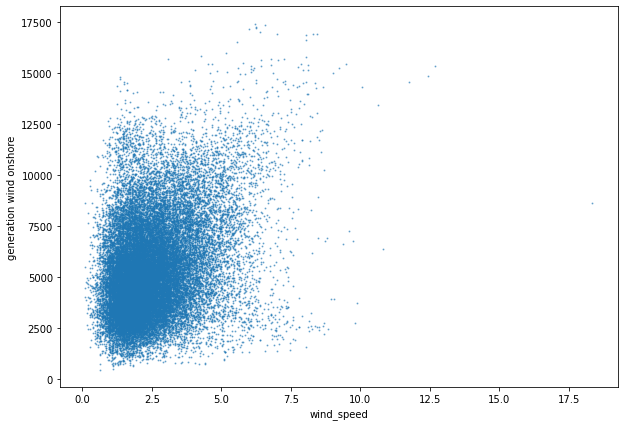

wind_speed | forecast wind onshore day ahead
0.30951378023995274


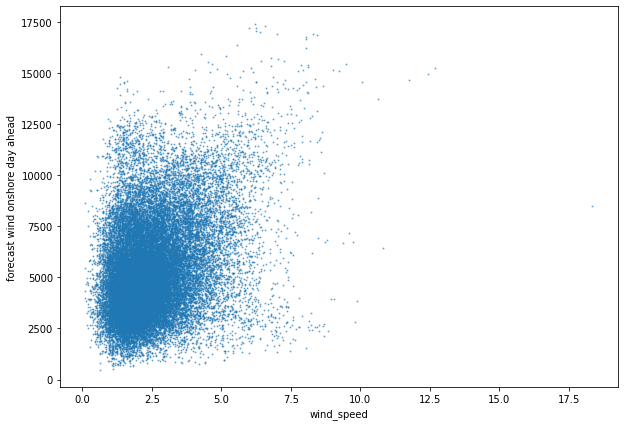

wind_speed | price actual
-0.2823480010143897


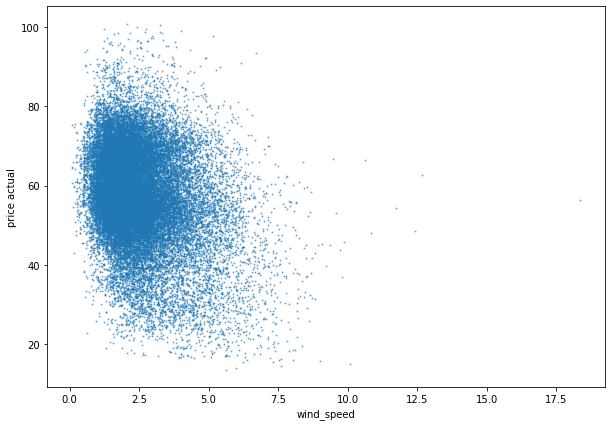

temp | generation hydro pumped storage consumption
-0.27839613491549325


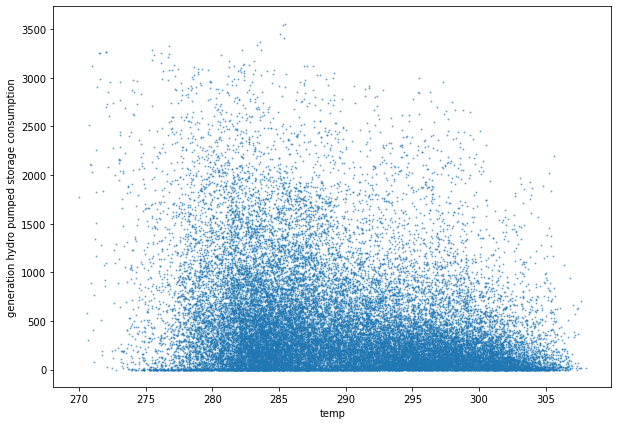

humidity | total load actual
-0.22492768880983233


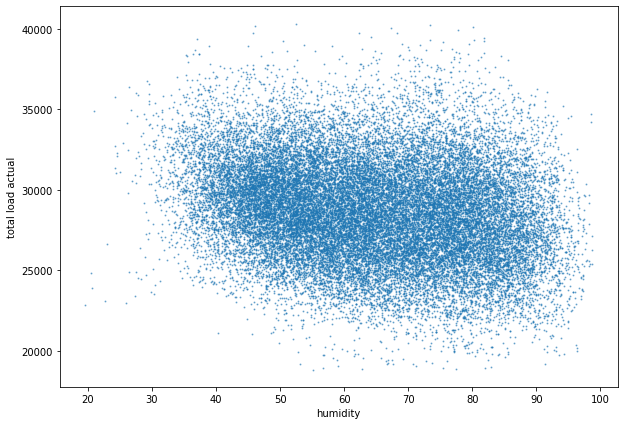

humidity | total load forecast
-0.22313384614417156


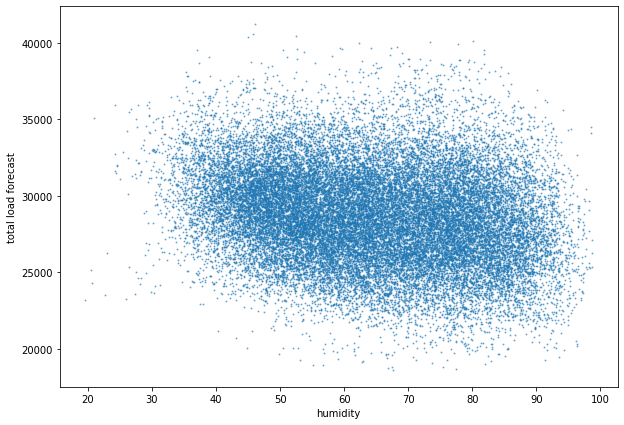

In [311]:
for tup in weightedCorr[0:10]:
    # tuple data
    print(tup[1],"|",tup[2])
    print(tup[0])

    # scatter plot
    plt.figure(figsize=(10,7))
    plt.scatter(weightedAvg[[tup[1]]],weightedAvg[[tup[2]]], color='tab:blue', alpha=.5, s=1)
    plt.xlabel(tup[1])
    plt.ylabel(tup[2])
    plt.show()

In [256]:
dfClean = dfAvg.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
                                 'generation fossil coal-derived gas',
                                 'generation fossil oil shale', 'generation fossil peat',
                                 'generation geothermal', 'generation marine', 'generation wind offshore','rain_3h'])
print(dfClean.shape)
dfClean=dfClean.dropna()
print(dfClean.shape)
dfClean.nunique()

(36239, 31)
(32226, 31)


generation biomass                              1841
generation fossil brown coal/lignite            4689
generation fossil gas                          17853
generation fossil hard coal                    19268
generation fossil oil                           1196
generation hydro pumped storage consumption     7566
generation hydro run-of-river and poundage      6518
generation hydro water reservoir               17223
generation nuclear                              9361
generation other                                 454
generation other renewable                       299
generation solar                               14442
generation waste                                1071
generation wind onshore                        21427
forecast solar day ahead                       14553
forecast wind onshore day ahead                21328
total load forecast                            23516
total load actual                              23465
price day ahead                               

# PCA

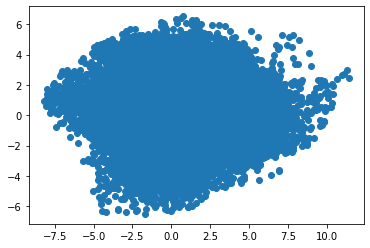

In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dfPCA = StandardScaler().fit_transform(dfClean)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfPCA)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2']) #, 'principal component 3'


plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

# TSNE

In [258]:
from sklearn.manifold import TSNE
 
dfTSNE=dfClean
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(dfTSNE)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 


/Users/joshp/opt/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/joshp/opt/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(32226, 2)

In [274]:
y = dfTSNE[['price actual']].applymap(lambda x: round(x/10))
y = y['price actual'].tolist()

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2' , hue='label' , data=tsne_result_df, ax=ax,s=120, alpha=0.1)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)